In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
dataset=pd.read_csv("C:\\Users\\aymen_s\\Desktop\\breastCancer.csv")
dataset.info()
np.random.seed(12)

# np.random.seed() est utilisé pour garantir la reproductibilité



# on constate que la column "bare_nucleoli" est de type object ce qui va poser des problèmes dans les calculs


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [16]:
dataset=dataset.drop(['id'], axis = 1)
#la column id est inutile
dataset=dataset.rename(columns={"class": "diagnostique"})
dataset['diagnostique']=dataset['diagnostique'].replace(to_replace=2,value=0)
dataset['diagnostique']=dataset['diagnostique'].replace(to_replace=4,value=1)
dataset['diagnostique']


0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: diagnostique, Length: 699, dtype: int64

In [17]:
dataset["bare_nucleoli"] =pd.to_numeric(dataset["bare_nucleoli"],errors='coerce')
#il faut convertire  de object  à un type numérique
dataset.info()

""" """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        683 non-null float64
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
diagnostique         699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


' '

In [18]:

dataset.isnull().sum()
# on remarque que il existe 16 valeurs null dans la column "bare_nucleoli" ce qui vas poser un autre problèm 

clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
diagnostique          0
dtype: int64

In [19]:
x=dataset['bare_nucleoli'].mean()
#on remplace les donnés manquant par la moyenne
dataset['bare_nucleoli'].fillna(x,inplace=True)

In [20]:
dataset.isnull().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
diagnostique         0
dtype: int64

In [21]:
# Récupérer les features et les variables target
X = dataset.iloc[:,:-1]
y = dataset['diagnostique']

In [22]:
#Utilisez 70% de la donnée pour l'apprentissage et les 30% restants pour le test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

Text(0, 0.5, 'moyenn d"erreur')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

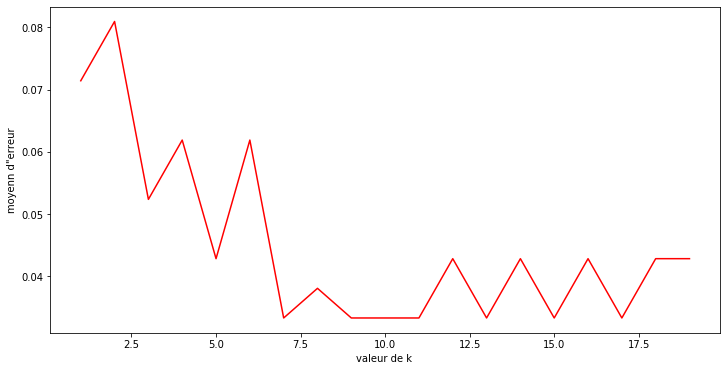

In [23]:
#ce graphe là vas nous aider a choisir la meilleur valeur de K 
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red')
plt.xlabel('valeur de k ')
plt.ylabel('moyenn d"erreur')

Le classificateur donne t-il de bons résultats?

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=15,metric='euclidean') # charger le classificateur KNN
knn.fit(X_train, y_train)#entraîner le modèles
y_pred=knn.predict(X_test) #evaluer le modèles

In [25]:
from sklearn.metrics import precision_score, recall_score
print('precision=',precision_score(y_test,y_pred, pos_label=1))
print('recall=',recall_score(y_test,y_pred, pos_label=1))
precision=precision_score(y_test,y_pred, pos_label=1)
recall=recall_score(y_test,y_pred, pos_label=1)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1 score=",F1)

precision= 0.9333333333333333
recall= 0.9722222222222222
F1 score= 0.9523809523809524


In [26]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test, y_pred)

array([[133,   5],
       [  2,  70]], dtype=int64)

### Interprétation des résultats
TP= 133, TN=70, FN=5, FP=2
